Estudio del *dataset* de Dipromats:

In [4]:
# DATOS: https://sites.google.com/view/dipromats2023/home ***HAY QUE CITARLO APROPIADAMENTE*** #

### IMPORTS ###
import pandas as pd
import numpy as np
import pathlib as pl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [5]:
### GOOGLE DRIVE ###
from google.colab import drive
drive.mount('/content/drive')

PATH = "/content/drive/My Drive/TFM/Data/Dipromats/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
### PARTICIÓN ###
df = pd.read_json(PATH + "train_en.json",  encoding='utf-8', encoding_errors='ignore')
df = df[['text', 'label_task2']]
df = df.rename(columns={"text": "Text", "label_task2": "Label"})
df.fillna(" ", inplace=True)

df = df[df.Label != ""]

X_train = df['Text']
y_train = df['Label']

X_train, X_aux, y_train, y_aux = train_test_split(X_train, y_train, test_size=0.3, random_state=55)
X_val, X_test, y_val, y_test = train_test_split(X_aux, y_aux, test_size=0.66, random_state=55)

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

print('Tamaño conjunto de Entrenamiento:', len(X_train))
print('Tamaño conjunto de Validación:', len(X_val))
print('Tamaño conjunto de Evaluación:', len(X_test))

Tamaño conjunto de Entrenamiento: 1381
Tamaño conjunto de Validación: 201
Tamaño conjunto de Evaluación: 392


# **ESTUDIO TRAINING**

Group 3    489
Group 2    455
Group 1    433
Group 4      4
Name: Label, dtype: int64


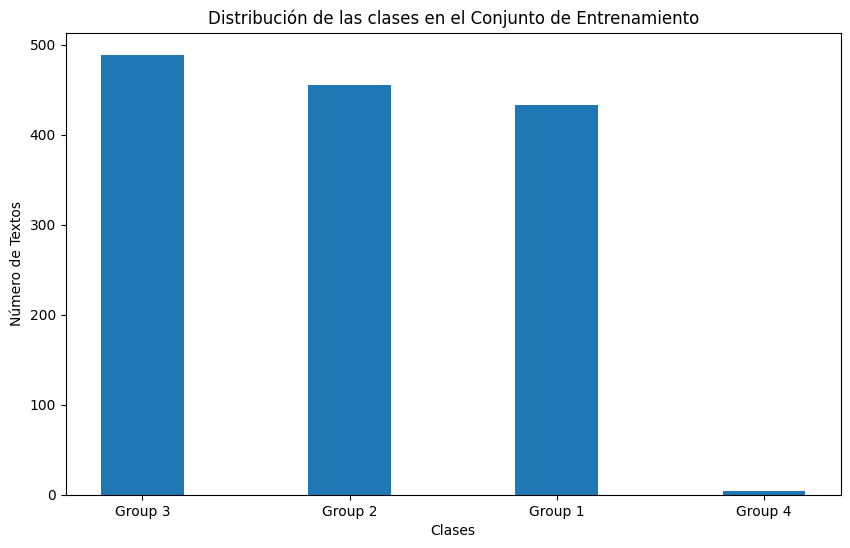

In [7]:
# Análisis de Distribución #
counts = y_train.value_counts()
print(counts)

counts_train = y_train.value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_train.keys()
values = counts_train.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Entrenamiento")
plt.show()

In [8]:
# Análisis de Longitud #
Train_len = X_train.apply(lambda text: len(str(text).split()))
Train_len.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    1381.000000
mean       39.035482
std         8.355301
min         7.000000
25%        35.000000
50%        41.000000
75%        45.000000
90%        48.000000
95%        50.000000
99%        52.000000
max        59.000000
Name: Text, dtype: float64

Text(0, 0.5, 'Número de textos')

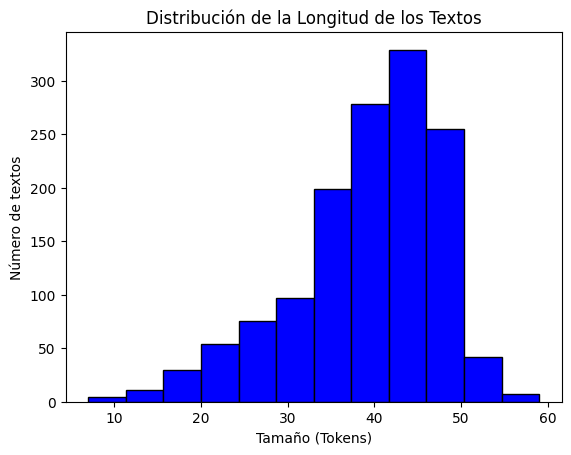

In [9]:
plt.hist(Train_len, color = 'blue', edgecolor = 'black', bins = int(60/5))
plt.title('Distribución de la Longitud de los Textos')
plt.xlabel('Tamaño (Tokens)')
plt.ylabel('Número de textos')

Text(0, 0.5, 'Densidad')

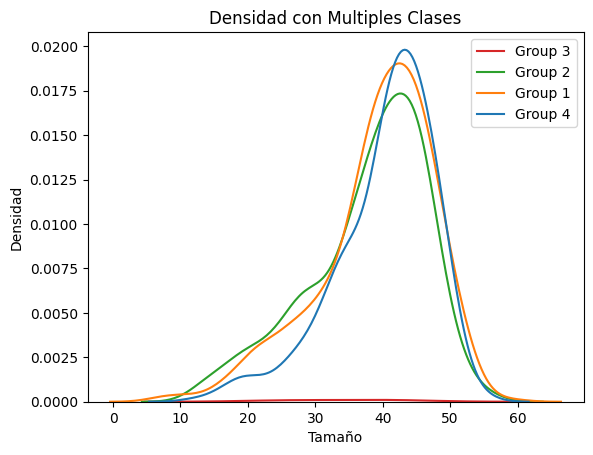

In [10]:
# Densidad de Clases #
Densidad = pd.DataFrame({'Length': Train_len, 'Label': y_train})
sns.kdeplot(data=Densidad, x='Length', hue='Label')

plt.legend(LABELS)
plt.title('Densidad con Multiples Clases')
plt.xlabel('Tamaño')
plt.ylabel('Densidad')

# **ESTUDIO VALIDACIÓN**

Group 2    78
Group 3    65
Group 1    58
Name: Label, dtype: int64


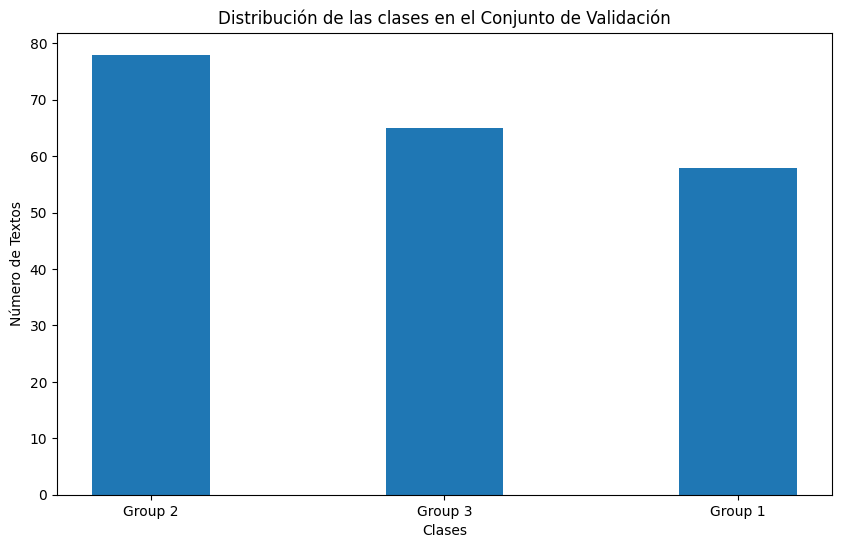

In [11]:
# Análisis de Distribución #
counts = y_val.value_counts()
print(counts)

counts_val = y_val.value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_val.keys()
values = counts_val.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Validación")
plt.show()

In [12]:
# Análisis de Longitud #
Val_len = X_val.apply(lambda text: len(str(text).split()))
Val_len.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    201.000000
mean      38.935323
std        8.270477
min       13.000000
25%       34.000000
50%       40.000000
75%       45.000000
90%       48.000000
95%       49.000000
99%       51.000000
max       56.000000
Name: Text, dtype: float64

Text(0, 0.5, 'Número de textos')

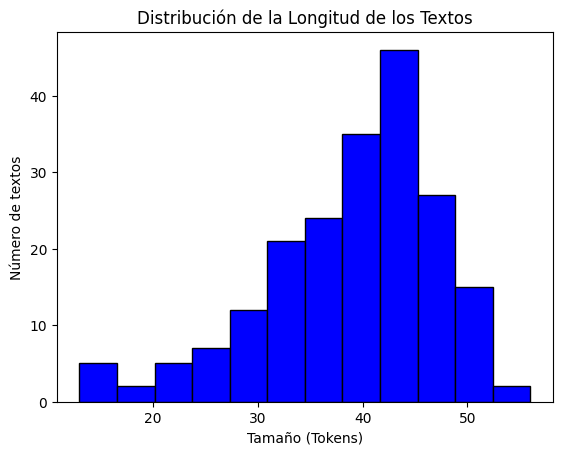

In [13]:
plt.hist(Val_len, color = 'blue', edgecolor = 'black', bins = int(60/5))
plt.title('Distribución de la Longitud de los Textos')
plt.xlabel('Tamaño (Tokens)')
plt.ylabel('Número de textos')

Text(0, 0.5, 'Densidad')

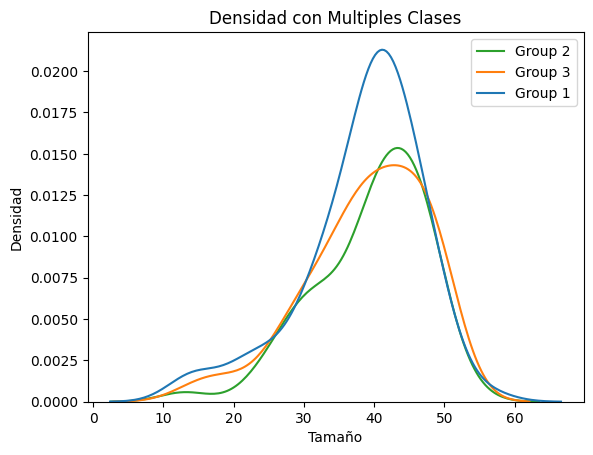

In [14]:
# Densidad de Clases #
Densidad2 = pd.DataFrame({'Length': Val_len, 'Label': y_val})
sns.kdeplot(data=Densidad2, x='Length', hue='Label')

plt.legend(LABELS)
plt.title('Densidad con Multiples Clases')
plt.xlabel('Tamaño')
plt.ylabel('Densidad')

# **ESTUDIO TEST**

Group 3    147
Group 2    129
Group 1    116
Name: Label, dtype: int64


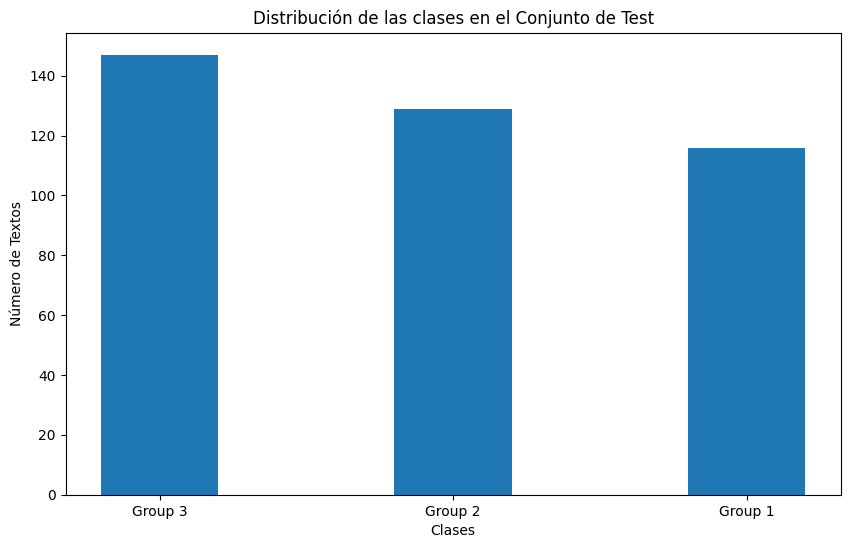

In [15]:
# Análisis de Distribución #
counts = y_test.value_counts()
print(counts)

counts_test = y_test.value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_test.keys()
values = counts_test.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Test")
plt.show()

In [16]:
# Análisis de Longitud #
Test_len = X_test.apply(lambda text: len(str(text).split()))
Test_len.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    392.000000
mean      38.540816
std        8.974438
min        8.000000
25%       34.000000
50%       40.500000
75%       45.000000
90%       48.000000
95%       50.000000
99%       52.000000
max       55.000000
Name: Text, dtype: float64

Text(0, 0.5, 'Número de textos')

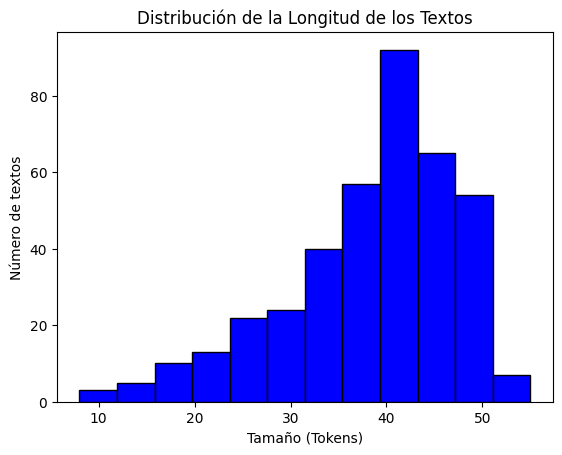

In [17]:
plt.hist(Test_len, color = 'blue', edgecolor = 'black', bins = int(60/5))
plt.title('Distribución de la Longitud de los Textos')
plt.xlabel('Tamaño (Tokens)')
plt.ylabel('Número de textos')

Text(0, 0.5, 'Densidad')

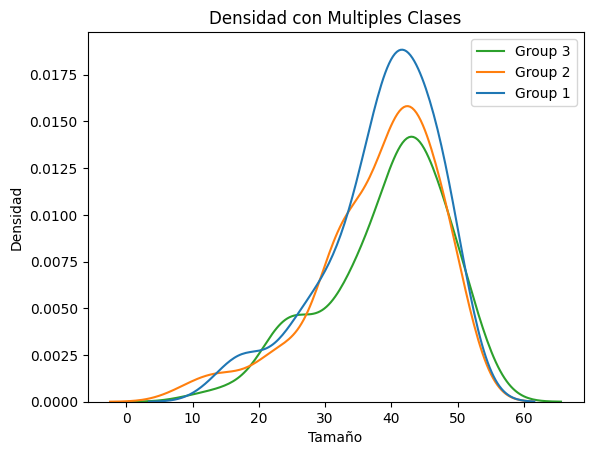

In [18]:
# Densidad de Clases #
Densidad3 = pd.DataFrame({'Length': Test_len, 'Label': y_test})
sns.kdeplot(data=Densidad3, x='Length', hue='Label')

plt.legend(LABELS)
plt.title('Densidad con Multiples Clases')
plt.xlabel('Tamaño')
plt.ylabel('Densidad')